In [5]:
import pandas as pd
df_wine = pd.read_csv('../Datasets/Reviews.csv')

In [11]:
print(df_wine.columns)
print(df_wine.shape)


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
(568454, 10)


In [2]:
#1. Standardizing the data

# separate training and test sets—using 70 percent and 30 percent of the data
from sklearn.model_selection import train_test_split
#slice X=[all rows, 1 to all col] y=[all rows, only first col]
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values 
#Split arrays or matrices into random train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [3]:
# standardize the features
from sklearn.preprocessing import StandardScaler
#Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
#linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nMatriz de covarianza Σ \n%s' % cov_mat)
print('\nEigen-valores \n%s' % eigen_vals)
print('\nEigen-vectores \n%s' % eigen_vecs)


Matriz de covarianza Σ 
[[ 1.00813008  0.06709556  0.17405351 -0.35439069  0.26374703  0.29079481
   0.21835807 -0.08111974  0.10436705  0.54282846  0.05893536 -0.01797029
   0.6415292 ]
 [ 0.06709556  1.00813008  0.08326463  0.26356776 -0.11349172 -0.33735555
  -0.41035281  0.33653916 -0.21602672  0.17504154 -0.551593   -0.40561695
  -0.24089991]
 [ 0.17405351  0.08326463  1.00813008  0.46420355  0.29092834  0.18020384
   0.15537535  0.15918823 -0.00703776  0.20549146  0.00665422  0.02039019
   0.223495  ]
 [-0.35439069  0.26356776  0.46420355  1.00813008 -0.07406447 -0.28060672
  -0.31391899  0.31581353 -0.24621059 -0.08872685 -0.22595587 -0.16799906
  -0.46393412]
 [ 0.26374703 -0.11349172  0.29092834 -0.07406447  1.00813008  0.25667578
   0.21025773 -0.26003426  0.19601657  0.20606456  0.13359768  0.06633258
   0.41810999]
 [ 0.29079481 -0.33735555  0.18020384 -0.28060672  0.25667578  1.00813008
   0.87123661 -0.44979792  0.62334099 -0.05689854  0.50664086  0.71978745
   0.5298692

In [5]:
#cumsum we can then calculate the cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [6]:
#plot via Matplotlib's step function
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='varianza explicada individual')
plt.step(range(1,14), cum_var_exp, where='mid', label='varianza explicada acumulada')
plt.ylabel('Relación de varianza explicada ')
plt.xlabel('Índice del Componente Principal')
plt.title('Variance Explained Ratios')
plt.legend(loc='best')
plt.show()

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])

for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

#collect the two eigenvectors that correspond to the two largest eigenvalues
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matriz W:\n', w)

Matriz W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [8]:
#we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace
X_train_std[0].dot(w)

#transform the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product
X_train_pca = X_train_std.dot(w)

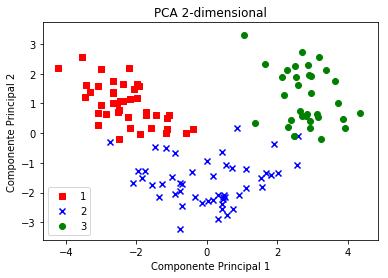

In [9]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
    
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA 2-dimensional')
plt.legend(loc='lower left')
plt.show()

In [10]:
#classify the transformed samples via logistic regression, and visualize the decision regions via the plot_decision_region function
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

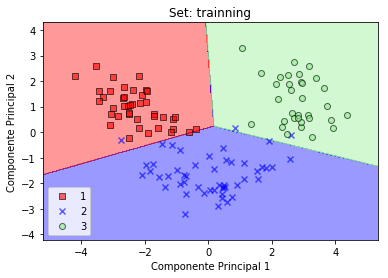

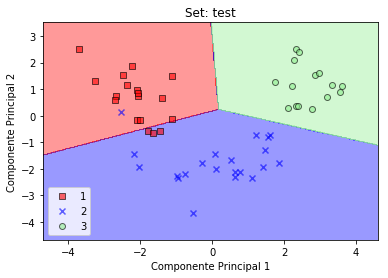

In [11]:
#Training Simple Machine Learning Algorithms for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

#trainning
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Set: trainning')
plt.legend(loc='lower left')
plt.show()

#test
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Set: test')
plt.legend(loc='lower left')
plt.show()

In [12]:
#explained variance ratios of the different principal components
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.36951469,  0.18434927,  0.11815159,  0.07334252,  0.06422108,
        0.05051724,  0.03954654,  0.02643918,  0.02389319,  0.01629614,
        0.01380021,  0.01172226,  0.00820609])